In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from matplotlib.colors import ListedColormap

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV


In [ ]:
# Load data
phish_df = pd.read_csv('/content/phishingData.csv')
phish_df = phish_df.dropna()

In [ ]:
# Creating decision tree only using the all the features
feature = ['having_IP_Address', 'URL_Length', 'Shortining_Service',
             'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
             'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
             'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
             'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
             'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
             'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
             'Google_Index', 'Links_pointing_to_page', 'Statistical_report']
target = ['Result']
X = phish_df[feature]
y = phish_df['Result']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
#train decision tree

clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# search over a range of max_depth

params =  {
    'max_depth': [ 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30] }

# Create gridsearch instance

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=2)

# Fit the model
grid.fit(X_train, y_train)

# Assess the score
grid.best_score_, grid.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ......................................

(0.9589042056894315, {'max_depth': 24})

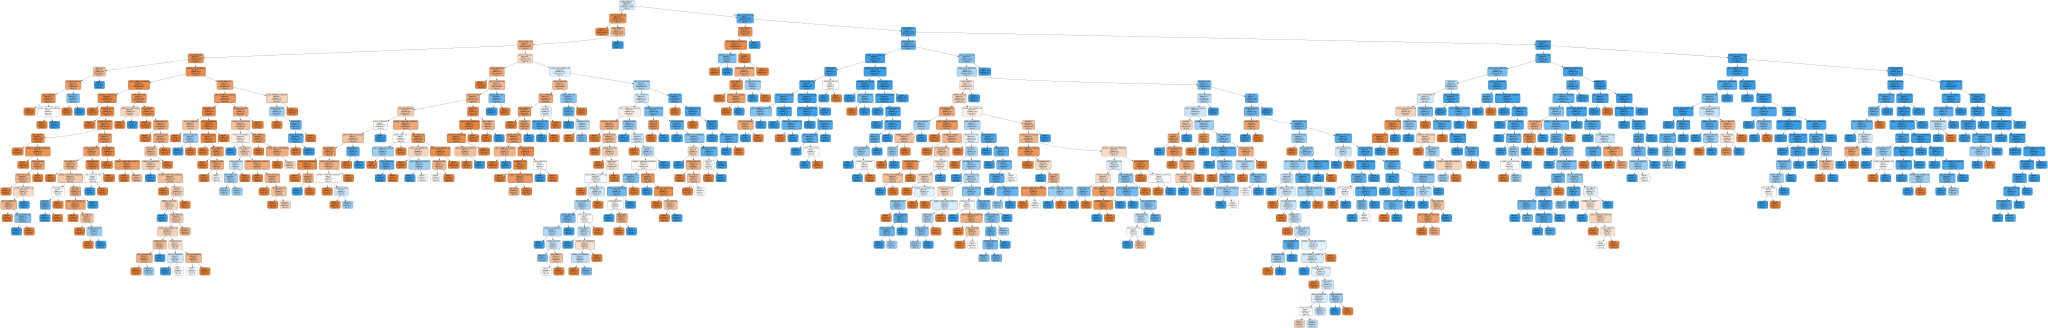

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("phish_all")

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=feature,
                     class_names= [str(0), str(1)],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Make predictions
y_pred = clf.predict(X_train)

y_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[3437   33]
 [  39 4229]]
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3470
           1       0.99      0.99      0.99      4268

    accuracy                           0.99      7738
   macro avg       0.99      0.99      0.99      7738
weighted avg       0.99      0.99      0.99      7738



In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1352   76]
 [  63 1826]]
              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1428
           1       0.96      0.97      0.96      1889

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [ ]:
# Creating decision tree only using 6 features
feature = ['having_IP_Address', 'URL_Length', 'Shortining_Service',
             'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix']
target = ['Result']
X = phish_df[feature]
y = phish_df['Result']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_train)

y_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

# Make predictions
y_pred = clf.predict(X_test)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1507 1963]
 [ 811 3457]]
              precision    recall  f1-score   support

          -1       0.65      0.43      0.52      3470
           1       0.64      0.81      0.71      4268

    accuracy                           0.64      7738
   macro avg       0.64      0.62      0.62      7738
weighted avg       0.64      0.64      0.63      7738

[[ 608  820]
 [ 376 1513]]
              precision    recall  f1-score   support

          -1       0.62      0.43      0.50      1428
           1       0.65      0.80      0.72      1889

    accuracy                           0.64      3317
   macro avg       0.63      0.61      0.61      3317
weighted avg       0.64      0.64      0.63      3317



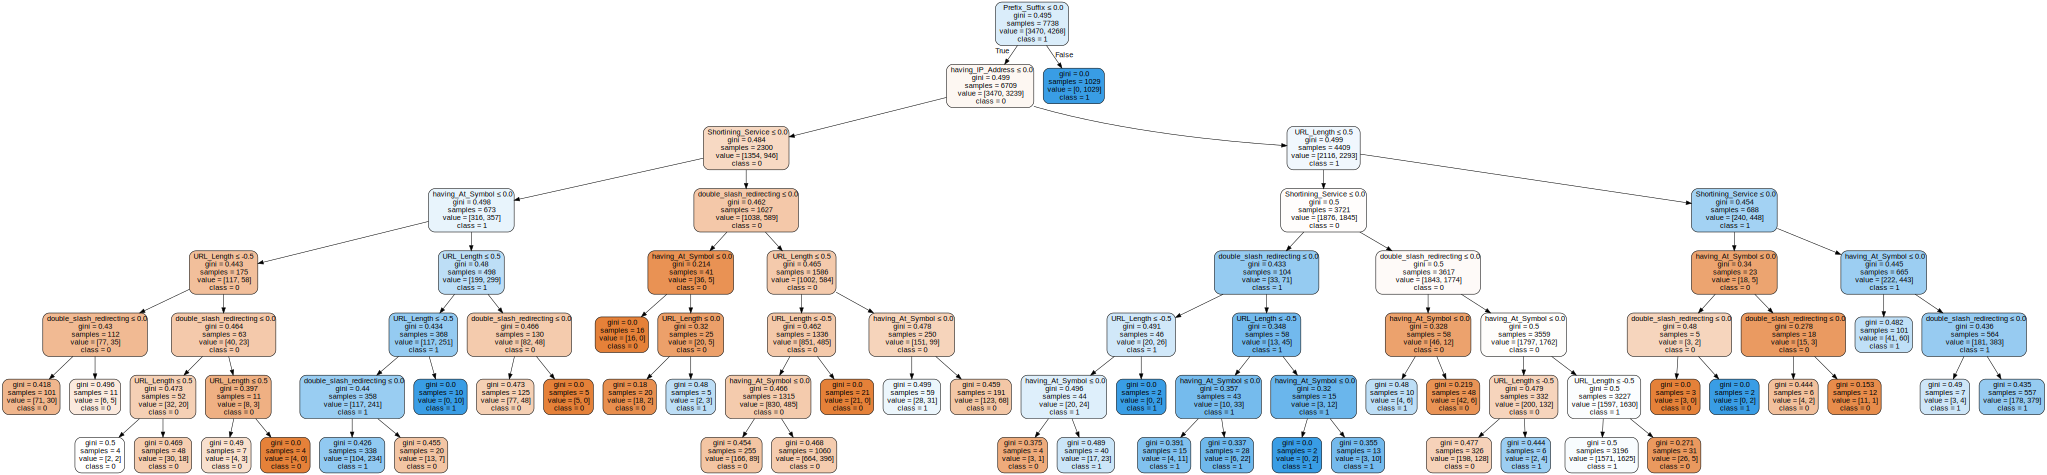

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("phish_1")

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=feature,
                     class_names= [str(0), str(1)],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Creating decision tree only 12 the features
feature = ['having_IP_Address', 'URL_Length', 'Shortining_Service',
             'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
             'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
             'Favicon', 'port', 'HTTPS_token']
target = ['Result']
X = phish_df[feature]
y = phish_df['Result']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_train)

y_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

# Make predictions
y_pred = clf.predict(X_test)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3095  375]
 [ 269 3999]]
              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      3470
           1       0.91      0.94      0.93      4268

    accuracy                           0.92      7738
   macro avg       0.92      0.91      0.92      7738
weighted avg       0.92      0.92      0.92      7738

[[1249  179]
 [ 144 1745]]
              precision    recall  f1-score   support

          -1       0.90      0.87      0.89      1428
           1       0.91      0.92      0.92      1889

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



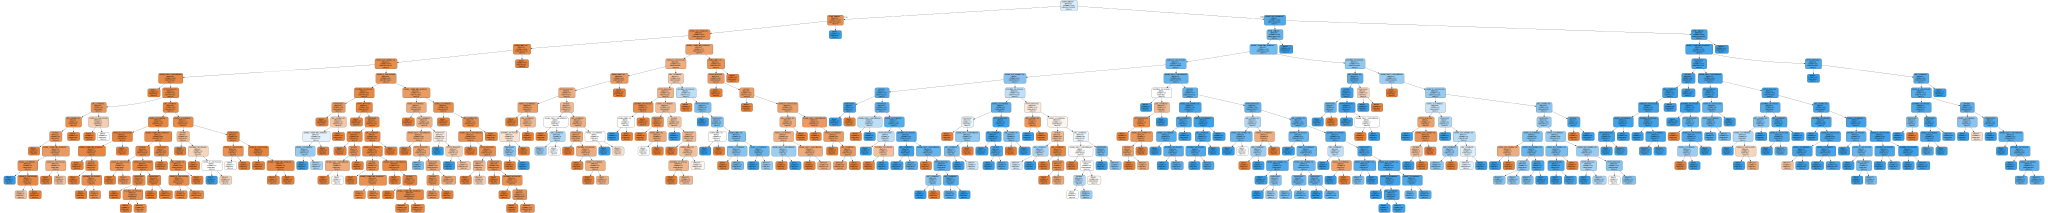

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("phish_2")

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=feature,
                     class_names= [str(0), str(1)],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Creating decision tree only using the 20 the features
feature = ['having_IP_Address', 'URL_Length', 'Shortining_Service',
             'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
             'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
             'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
             'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
             'Redirect', 'on_mouseover']
target = ['Result']
X = phish_df[feature]
y = phish_df['Result']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_train)

y_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

# Make predictions
y_pred = clf.predict(X_test)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3303  167]
 [ 116 4152]]
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      3470
           1       0.96      0.97      0.97      4268

    accuracy                           0.96      7738
   macro avg       0.96      0.96      0.96      7738
weighted avg       0.96      0.96      0.96      7738

[[1322  106]
 [  81 1808]]
              precision    recall  f1-score   support

          -1       0.94      0.93      0.93      1428
           1       0.94      0.96      0.95      1889

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



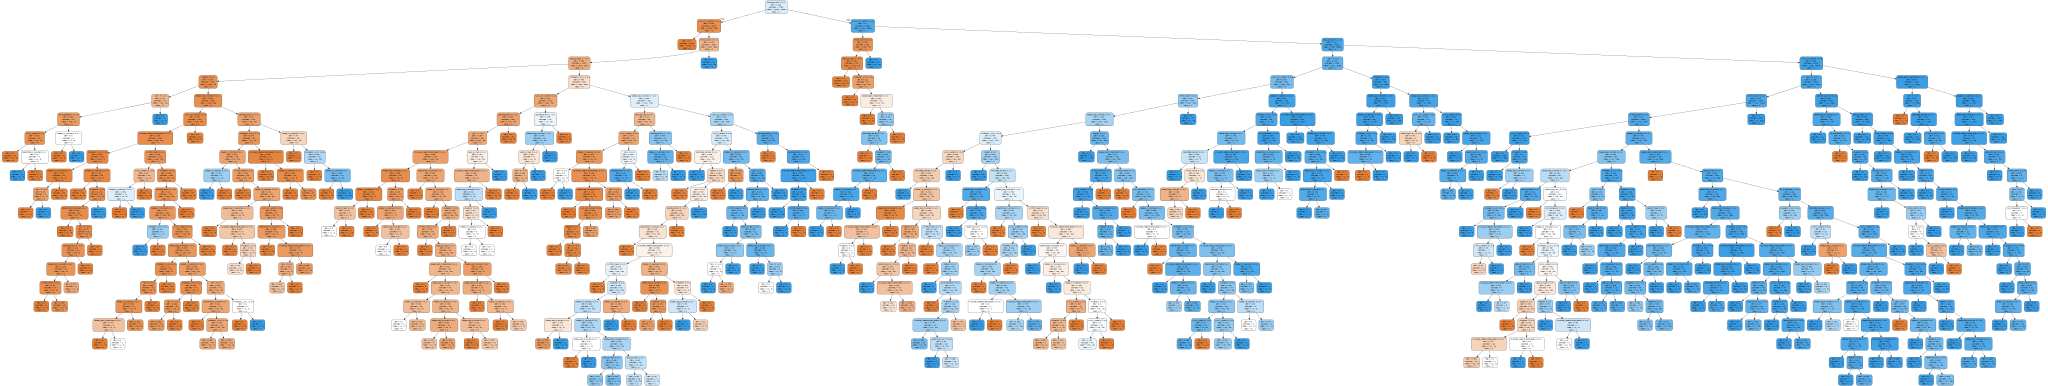

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("phish_4")

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=feature,
                     class_names= [str(0), str(1)],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Creating decision tree only using 29 features
feature = ['having_IP_Address', 'URL_Length', 'Shortining_Service',
             'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
             'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
             'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
             'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
             'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
             'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
             'Google_Index', 'Links_pointing_to_page']
target = ['Result']
X = phish_df[feature]
y = phish_df['Result']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_train)

y_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

# Make predictions
y_pred = clf.predict(X_test)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3439   31]
 [  42 4226]]
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3470
           1       0.99      0.99      0.99      4268

    accuracy                           0.99      7738
   macro avg       0.99      0.99      0.99      7738
weighted avg       0.99      0.99      0.99      7738

[[1351   77]
 [  70 1819]]
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95      1428
           1       0.96      0.96      0.96      1889

    accuracy                           0.96      3317
   macro avg       0.96      0.95      0.95      3317
weighted avg       0.96      0.96      0.96      3317



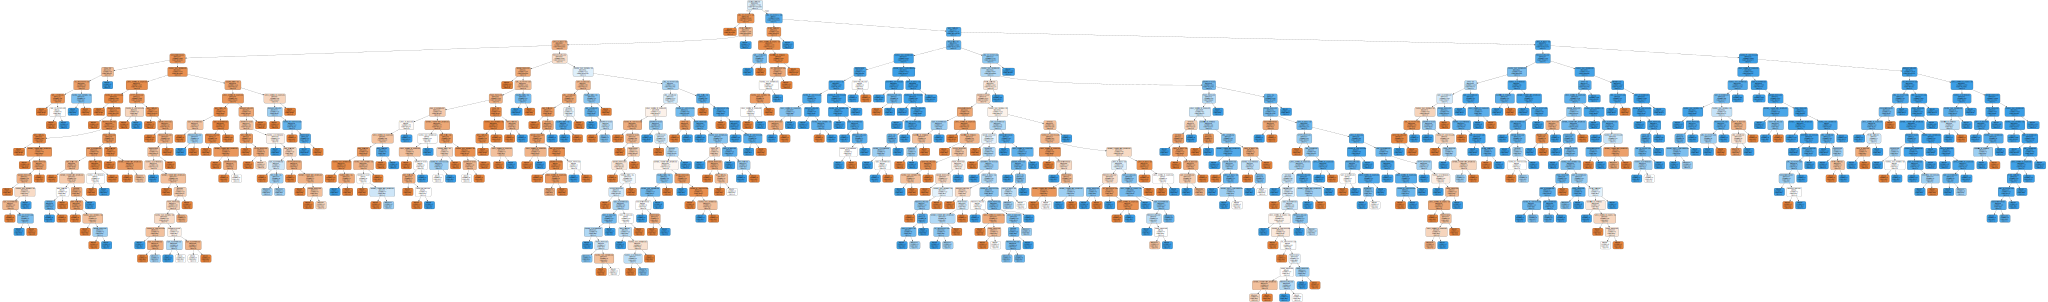

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("phish_4")

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=feature,
                     class_names= [str(0), str(1)],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph